# The Cinematic Nexus: Unveiling the Future of Movie Recommendations and Analysis

by Anthony Amadasun

## 1.1 Data Cleaning and EDA 

---

### 1.1.1 Introduction




In this section, the project will detail the process of acquiring and preparing the data for our movie recommendation system. This includes data gathering, cleaning, and conducting exploratory data analysis.

---

#### Imports

In [1]:
#pip install tmdbsimple

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


import requests
import time

import getpass
import tmdbsimple as tmdb

#for transaction log
import datetime
import json

### 1.1.2 Data Collection

This project use the TMDB API to collect comprehensive movie data, ensuring a diverse and representative dataset for our recommendation system.

**Deliverables:**
- Retrieve movie data from TMDB API, ensuring comprehensive coverage of movie details.
- Validate the integrity of the dataset to avoid missing or incomplete information.
- Handle any API rate limitations, ensuring a smooth and ethical interaction with the TMDB API.

---

In [3]:
# This function uses the tmdbsimple library to interact with TMDB API
def collect_movie_data(api_key, num_movies=1000):
    tmdb.API_KEY = api_key

    # Loop to collect data until reaching the desired number of movies
    movies_data = []
    page = 1
    cumulative_movies_retrieved = 0

    while len(movies_data) < num_movies:
        try:
            response = tmdb.Discover().movie(sort_by='popularity.desc', page=page)
            if not response['results']:
                break
            page += 1
            movies_data.extend(response['results'])
            cumulative_movies_retrieved += len(response['results'])
            time.sleep(0.5)  # handles rate limitation
        except Exception as e:
            print(f"Error: {e}")
            break

        # Log transaction details
        transaction_log = {
            'execution_datetime': str(datetime.datetime.now()),
            'movies_retrieved': len(movies_data),
            'total_movies_retrieved_to_date': cumulative_movies_retrieved + len(movies_data)
        }

        # Writing to a JSON file
        with open('../data/transaction_log_movies.json', 'a') as log_file:
            log_file.write(json.dumps(transaction_log) + '\n')

    # real-time updates
#     with open('../data/transaction_log_movies.json', 'r') as log_file:
#         logs = log_file.readlines()

#         for log in logs:
#             print(log)

    return movies_data


In [4]:
api_key = getpass.getpass(prompt="Enter your TMDB API key:")

Enter your TMDB API key: ········


In [5]:
movie_data = collect_movie_data(api_key, num_movies=5000)

In [6]:
#create dataframe for the movie data
tmdb_df = pd.DataFrame(movie_data)

In [7]:
#check first 5 rows
tmdb_df.head()

adult                     backdrop_path        genre_ids       id  \
0  False  /pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg    [878, 28, 18]   933131   
1  False  /unvtbkgxh47BewQ8pENvdOdme0r.jpg         [28, 18]  1212073   
2  False  /yyFc8Iclt2jxPmLztbP617xXllT.jpg  [35, 10751, 14]   787699   
3  False  /criPrxkTggCra1jch49jsiSeXo1.jpg    [878, 12, 28]   609681   
4  False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg     [28, 53, 18]   866398   

  original_language original_title  \
0                ko             황야   
1                de     60 Minuten   
2                en          Wonka   
3                en    The Marvels   
4                en  The Beekeeper   

                                            overview  popularity  \
0  After a deadly earthquake turns Seoul into a l...    3228.455   
1  Desperate to keep custody of his daughter, a m...    2041.947   
2  Willy Wonka – chock-full of ideas and determin...    1758.657   
3  Carol Danvers, aka Captain Marvel, has reclaim...    1634.973   
4  One man’s campaign for vengeance takes on nati...    1451.512   

                        poster_path release_date            title  video  \
0  /24CL0ySodCF8bcm38xtBeHzHp7W.jpg   2024-01-26  Badland Hunters  False   
1  /aajCqg315CoJPu1NmgPCkbRjnl6.jpg   2024-01-19    Sixty Minutes  False   
2  /qhb1qOilapbapxWQn9jtRCMwXJF.jpg   2023-12-06            Wonka  False   
3  /9GBhzXMFjgcZ3FdR9w3bUMMTps5.jpg   2023-11-08      The Marvels  False   
4  /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10    The Beekeeper  False   

   vote_average  vote_count  
0         6.942         286  
1         7.092         251  
2         7.218        2018  
3         6.309        1576  
4         7.304         995

In [8]:
#retrieve additional information such as directors and cast for the movies.
#https://developer.themoviedb.org/docs/append-to-response

for movie_id in tmdb_df['id']:
    # Make a request to the /credits endpoint for each movie
    credits_url = f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key=80c789bfee481fd91466be1937d446c3'
    credits_response = requests.get(credits_url)
    
    # Checking if the request was successful
    if credits_response.status_code == 200:
        # Parsing the response JSON to extract director and cast information
        credits_data = credits_response.json()
        directors = [crew['name'] for crew in credits_data['crew'] if crew['job'] == 'Director']
        cast = [cast_member['name'] for cast_member in credits_data['cast']]
        
        # Update DataFrame with the obtained information
        # e.g., create new columns directors and cast
        tmdb_df.loc[tmdb_df['id'] == movie_id, 'directors'] = ', '.join(directors)
        tmdb_df.loc[tmdb_df['id'] == movie_id, 'cast'] = ', '.join(cast)
    else:
        print(f"Failed to retrieve credits for movie ID {movie_id}")




In [9]:
tmdb_df.head()

adult                     backdrop_path        genre_ids       id  \
0  False  /pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg    [878, 28, 18]   933131   
1  False  /unvtbkgxh47BewQ8pENvdOdme0r.jpg         [28, 18]  1212073   
2  False  /yyFc8Iclt2jxPmLztbP617xXllT.jpg  [35, 10751, 14]   787699   
3  False  /criPrxkTggCra1jch49jsiSeXo1.jpg    [878, 12, 28]   609681   
4  False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg     [28, 53, 18]   866398   

  original_language original_title  \
0                ko             황야   
1                de     60 Minuten   
2                en          Wonka   
3                en    The Marvels   
4                en  The Beekeeper   

                                            overview  popularity  \
0  After a deadly earthquake turns Seoul into a l...    3228.455   
1  Desperate to keep custody of his daughter, a m...    2041.947   
2  Willy Wonka – chock-full of ideas and determin...    1758.657   
3  Carol Danvers, aka Captain Marvel, has reclaim...    1634.973   
4  One man’s campaign for vengeance takes on nati...    1451.512   

                        poster_path release_date            title  video  \
0  /24CL0ySodCF8bcm38xtBeHzHp7W.jpg   2024-01-26  Badland Hunters  False   
1  /aajCqg315CoJPu1NmgPCkbRjnl6.jpg   2024-01-19    Sixty Minutes  False   
2  /qhb1qOilapbapxWQn9jtRCMwXJF.jpg   2023-12-06            Wonka  False   
3  /9GBhzXMFjgcZ3FdR9w3bUMMTps5.jpg   2023-11-08      The Marvels  False   
4  /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10    The Beekeeper  False   

   vote_average  vote_count         directors  \
0         6.942         286  Heo Myeong-haeng   
1         7.092         251     Oliver Kienle   
2         7.218        2018         Paul King   
3         6.309        1576       Nia DaCosta   
4         7.304         995        David Ayer   

                                                cast  
0  Ma Dong-seok, Lee Hee-jun, Lee Jun-young, Roh ...  
1  Emilio Sakraya, Dennis Mojen, Marie Mouroum, F...  
2  Timothée Chalamet, Calah Lane, Keegan-Michael ...  
3  Brie Larson, Teyonah Parris, Iman Vellani, Zaw...  
4  Jason Statham, Emmy Raver-Lampman, Bobby Nader...

In [10]:
#display basic information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              5000 non-null   bool   
 1   backdrop_path      4943 non-null   object 
 2   genre_ids          5000 non-null   object 
 3   id                 5000 non-null   int64  
 4   original_language  5000 non-null   object 
 5   original_title     5000 non-null   object 
 6   overview           5000 non-null   object 
 7   popularity         5000 non-null   float64
 8   poster_path        4997 non-null   object 
 9   release_date       5000 non-null   object 
 10  title              5000 non-null   object 
 11  video              5000 non-null   bool   
 12  vote_average       5000 non-null   float64
 13  vote_count         5000 non-null   int64  
 14  directors          5000 non-null   object 
 15  cast               5000 non-null   object 
dtypes: bool(2), float64(2), 

In [11]:
#check shape
tmdb_df.shape

(5000, 16)

In [12]:
#check the data type
tmdb_df.dtypes

adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
poster_path           object
release_date          object
title                 object
video                   bool
vote_average         float64
vote_count             int64
directors             object
cast                  object
dtype: object

In [13]:
#Check for missing values in each columns
tmdb_df.isnull().sum()

adult                 0
backdrop_path        57
genre_ids             0
id                    0
original_language     0
original_title        0
overview              0
popularity            0
poster_path           3
release_date          0
title                 0
video                 0
vote_average          0
vote_count            0
directors             0
cast                  0
dtype: int64

In [14]:
#check for duplicates
print(f'number of duplicates in overview: {tmdb_df["overview"].duplicated().sum()}')
print(f'number of duplicates in title: {tmdb_df["title"].duplicated().sum()}')

number of duplicates in overview: 1180
number of duplicates in title: 1229


### 1.1.3 Data Cleaning and EDA

**Data Cleaning Deliverables:**

- Address missing or inconsistent data entries by applying appropriate imputation techniques.
- Standardize and clean data formats, ensuring consistency across different data fields.
- Handle outliers and anomalies that might impact the accuracy of recommendations.
- Normalize numerical features for better model performance.

**EDA Deliverables:**

- Conduct a thorough exploration of the dataset to gain insights into movie trends and characteristics.
- Analyze distributions of key variables such as genre, release year, and user ratings.
- Visualize the relationships between different features to identify potential patterns or correlations.
- Extract meaningful statistics to inform the modeling process.

**Dictionary**

- **Popularity:** The popularity of a movie is a metric that represents its relative popularity compared to other movies in the dataset. Popularity values are often influenced by various factors like social media mentions, views, and user interactions. Higher popularity values typically indicate that a movie is more widely known or discussed.
- **Vote Count:** The vote count represents the number of votes a movie has received. It's a measure of user engagement or participation. Higher vote counts generally indicate that more users have expressed their opinion about the movie by voting.
- **Vote Average:** The vote average is the average rating given to a movie by users who have voted. It is a measure of the overall rating or satisfaction level of a movie. Higher vote average values suggest that the movie has received more positive ratings from users.

---

In [15]:
#descriptive statistic
tmdb_df.describe()

id   popularity  vote_average   vote_count
count  5.000000e+03  5000.000000   5000.000000   5000.00000
mean   3.687828e+05    52.721911      6.541179   2714.34800
std    3.762446e+05   100.184685      1.284603   4067.09226
min    1.100000e+01    13.627000      0.000000      0.00000
25%    1.135950e+04    26.299000      6.100000    236.75000
50%    2.770615e+05    33.390500      6.699000   1215.00000
75%    6.464718e+05    48.890750      7.277250   3358.00000
max    1.239712e+06  3228.455000     10.000000  35230.00000

In [16]:
#convert release_date to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')

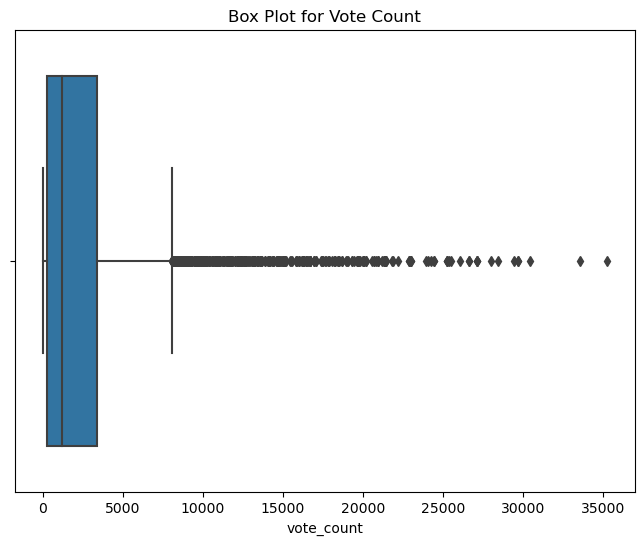

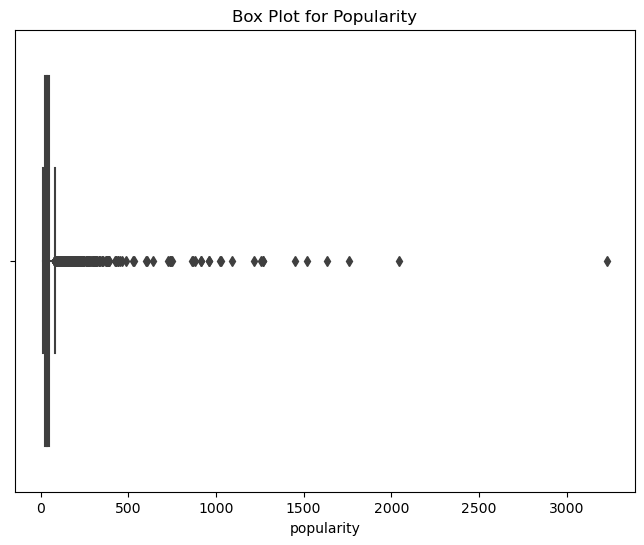

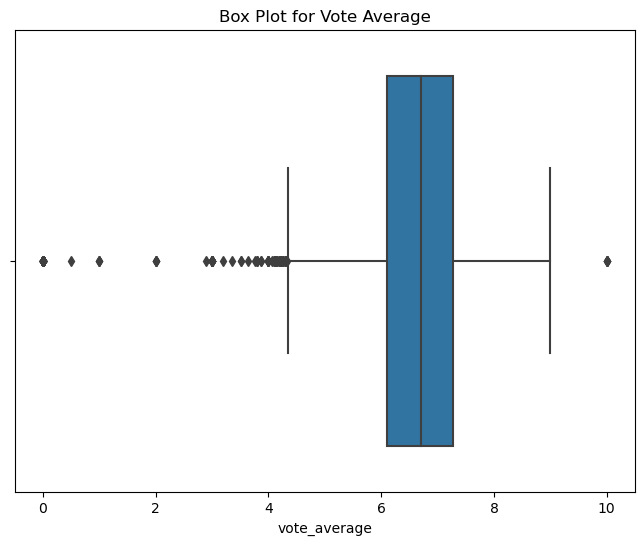

In [17]:
#box plot to check for outliers

# Box plot for vote_count
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_count'])
plt.title('Box Plot for Vote Count')
plt.savefig('../images/boxplot_vote_count.png', bbox_inches='tight')


# Box plot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['popularity'])
plt.title('Box Plot for Popularity')
plt.savefig('../images/boxplot_popularity.png', bbox_inches='tight')

plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_average'])
plt.title('Box Plot for Vote Average')
plt.savefig('../images/boxplot_vote_average.png', bbox_inches='tight')


The intution to keep outliers is based of the idea that popular movies tend to recieve higher number of votes. Removing popular movies based on vote count as outliers might not be appropriate for this recommender system as the goal of the analysis is to identify all type of movies that a users might like, rather than certain movies with a certain level of engagement. 

In [18]:
#checking duplicates in title column
title_duplicates = tmdb_df[tmdb_df.duplicated(subset='title', keep=False)]
title_duplicates

adult                     backdrop_path            genre_ids       id  \
4     False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg         [28, 53, 18]   866398   
19    False  /nTPFkLUARmo1bYHfkfdNpRKgEOs.jpg          [35, 10749]  1072790   
23    False  /nTPFkLUARmo1bYHfkfdNpRKgEOs.jpg          [35, 10749]  1072790   
35    False  /w12jjv5XNNpHgM4he1COnfWiA93.jpg     [28, 27, 35, 53]  1211483   
39    False  /su7FqHdZez0oOvpZAbV7P6BGq0R.jpg     [28, 80, 18, 53]   939335   
...     ...                               ...                  ...      ...   
4967  False  /pOEwPqwK4rfKaM1UJKU3eyWUtVF.jpg         [28, 35, 80]   783461   
4968  False  /aOeshAxAhiDVIiHsXVFmF6bgclh.jpg       [35, 9648, 27]   617505   
4974  False  /fwxy5gN06SLsgEs2I58yFbFlnMO.jpg         [35, 27, 53]    16780   
4983  False  /3gRvfpmPtBrJ5Xp6iLFyz7pJ06d.jpg  [28, 36, 18, 10752]   436391   
4995  False  /rStbi6Sm1JWk4S3pCqULUY7GMDB.jpg             [18, 36]   506528   

     original_language                             original_title  \
4                   en                              The Beekeeper   
19                  en                             Anyone But You   
23                  en                             Anyone But You   
35                  en                  Skal - Fight for Survival   
39                  en                                     Muzzle   
...                ...                                        ...   
4967                hi                                  लूप लपेटा   
4968                en                            Hubie Halloween   
4974                en  The Return of the Texas Chainsaw Massacre   
4983                ko                                        군함도   
4995                en                                    Harriet   

                                               overview  popularity  \
4     One man’s campaign for vengeance takes on nati...    1451.512   
19    After an amazing first date, Bea and Ben’s fie...     739.837   
23    After an amazing first date, Bea and Ben’s fie...     739.837   
35    My name's Arthur, a huge Internet star who's j...     426.947   
39    LAPD K-9 officer Jake Rosser has just witnesse...     384.292   
...                                                 ...         ...   
4967  When her boyfriend loses a mobster's cash, Sav...      22.445   
4968  Hubie Dubois, despite his devotion to his home...      22.443   
4974  Everyone's favorite chainsaw-wielding psychopa...      22.435   
4983  During the Japanese colonial era, roughly 400 ...      22.415   
4995  The extraordinary tale of Harriet Tubman's esc...      22.378   

                           poster_path release_date  \
4     /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10   
19    /yRt7MGBElkLQOYRvLTT1b3B1rcp.jpg   2023-12-21   
23    /yRt7MGBElkLQOYRvLTT1b3B1rcp.jpg   2023-12-21   
35    /uQkiDKQyun13mqsOXv7I5MRKr0q.jpg   2023-11-24   
39    /AsM1H8DfaNo7bRu4q76MaVRRbIY.jpg   2023-09-29   
...                                ...          ...   
4967  /onGdT8sYi89drvSJyEJnft97rOq.jpg   2022-02-04   
4968  /dbhC6qRydXyRmpUdcl9bL9rARya.jpg   2020-10-07   
4974  /e1ikqofvLBddrZJ73IjmJWhUYus.jpg   1995-09-22   
4983  /7Pn9IK13JHhB7vS5TSgz79cdLra.jpg   2017-07-26   
4995  /bNmuY9vOx1AEh3G8G1IUppFKAgj.jpg   2019-11-01   

                                          title  video  vote_average  \
4                                 The Beekeeper  False         7.304   
19                               Anyone But You  False         7.100   
23                               Anyone But You  False         7.045   
35                    Skal - Fight for Survival  False         0.000   
39                                       Muzzle  False         6.532   
...                                         ...    ...           ...   
4967                               Looop Lapeta  False         6.083   
4968                            Hubie Halloween  False         5.939   
4974  The Return of the Texas Chainsaw Massacre  False         4.6

In [19]:
#checking duplicates in overview column
overview_duplicates = tmdb_df[tmdb_df.duplicated(subset='overview', keep=False)]
overview_duplicates

adult                     backdrop_path            genre_ids       id  \
19    False  /nTPFkLUARmo1bYHfkfdNpRKgEOs.jpg          [35, 10749]  1072790   
23    False  /nTPFkLUARmo1bYHfkfdNpRKgEOs.jpg          [35, 10749]  1072790   
35    False  /w12jjv5XNNpHgM4he1COnfWiA93.jpg     [28, 27, 35, 53]  1211483   
39    False  /su7FqHdZez0oOvpZAbV7P6BGq0R.jpg     [28, 80, 18, 53]   939335   
45    False  /w12jjv5XNNpHgM4he1COnfWiA93.jpg     [28, 27, 35, 53]  1211483   
...     ...                               ...                  ...      ...   
4967  False  /pOEwPqwK4rfKaM1UJKU3eyWUtVF.jpg         [28, 35, 80]   783461   
4968  False  /aOeshAxAhiDVIiHsXVFmF6bgclh.jpg       [35, 9648, 27]   617505   
4974  False  /fwxy5gN06SLsgEs2I58yFbFlnMO.jpg         [35, 27, 53]    16780   
4983  False  /3gRvfpmPtBrJ5Xp6iLFyz7pJ06d.jpg  [28, 36, 18, 10752]   436391   
4995  False  /rStbi6Sm1JWk4S3pCqULUY7GMDB.jpg             [18, 36]   506528   

     original_language                             original_title  \
19                  en                             Anyone But You   
23                  en                             Anyone But You   
35                  en                  Skal - Fight for Survival   
39                  en                                     Muzzle   
45                  en                  Skal - Fight for Survival   
...                ...                                        ...   
4967                hi                                  लूप लपेटा   
4968                en                            Hubie Halloween   
4974                en  The Return of the Texas Chainsaw Massacre   
4983                ko                                        군함도   
4995                en                                    Harriet   

                                               overview  popularity  \
19    After an amazing first date, Bea and Ben’s fie...     739.837   
23    After an amazing first date, Bea and Ben’s fie...     739.837   
35    My name's Arthur, a huge Internet star who's j...     426.947   
39    LAPD K-9 officer Jake Rosser has just witnesse...     384.292   
45    My name's Arthur, a huge Internet star who's j...     426.947   
...                                                 ...         ...   
4967  When her boyfriend loses a mobster's cash, Sav...      22.445   
4968  Hubie Dubois, despite his devotion to his home...      22.443   
4974  Everyone's favorite chainsaw-wielding psychopa...      22.435   
4983  During the Japanese colonial era, roughly 400 ...      22.415   
4995  The extraordinary tale of Harriet Tubman's esc...      22.378   

                           poster_path release_date  \
19    /yRt7MGBElkLQOYRvLTT1b3B1rcp.jpg   2023-12-21   
23    /yRt7MGBElkLQOYRvLTT1b3B1rcp.jpg   2023-12-21   
35    /uQkiDKQyun13mqsOXv7I5MRKr0q.jpg   2023-11-24   
39    /AsM1H8DfaNo7bRu4q76MaVRRbIY.jpg   2023-09-29   
45    /uQkiDKQyun13mqsOXv7I5MRKr0q.jpg   2023-11-24   
...                                ...          ...   
4967  /onGdT8sYi89drvSJyEJnft97rOq.jpg   2022-02-04   
4968  /dbhC6qRydXyRmpUdcl9bL9rARya.jpg   2020-10-07   
4974  /e1ikqofvLBddrZJ73IjmJWhUYus.jpg   1995-09-22   
4983  /7Pn9IK13JHhB7vS5TSgz79cdLra.jpg   2017-07-26   
4995  /bNmuY9vOx1AEh3G8G1IUppFKAgj.jpg   2019-11-01   

                                          title  video  vote_average  \
19                               Anyone But You  False         7.100   
23                               Anyone But You  False         7.045   
35                    Skal - Fight for Survival  False         0.000   
39                                       Muzzle  False         6.532   
45                    Skal - Fight for Survival  False         0.000   
...                                         ...    ...           ...   
4967                               Looop Lapeta  False         6.083   
4968                            Hubie Halloween  False         5.939   
4974  The Return of the Texas Chainsaw Massacre  False         4.6

The duplicates found in overview and title is related to having nothing filled out in it columns, having different production year (but same name) or having same title and overview, but different feature (e.g., korean version, vote average, etc.) As a result the duplicates are not genuinely redundant and they are worth keep as they provide additional information.

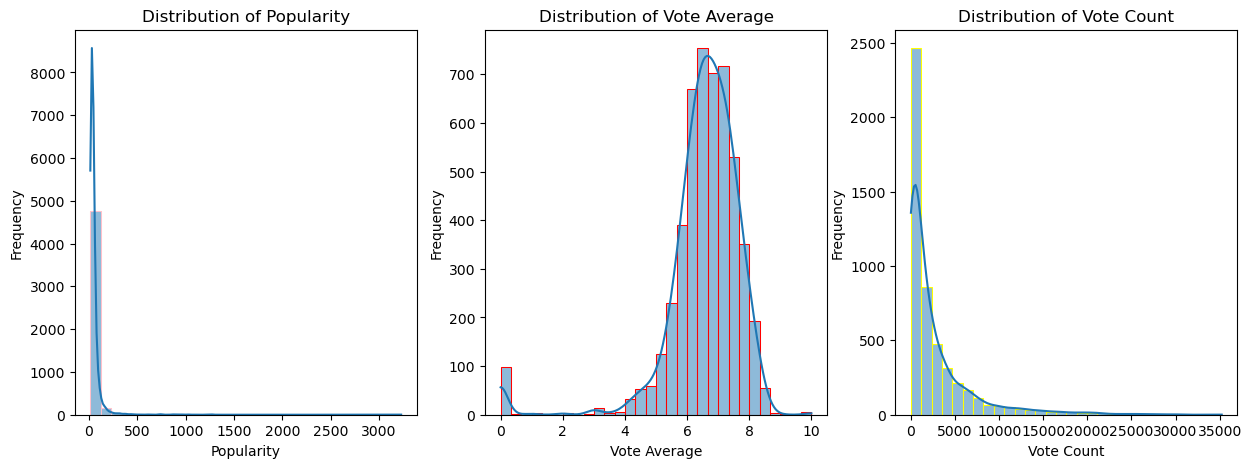

In [20]:
# #check distribution to see if the distribution is already well-behaved 
# #and within a reasonable range

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograms with KDE for 'popularity', 'vote_average', and 'vote_count'
sns.histplot(tmdb_df['popularity'], bins=30, kde=True, edgecolor='pink', ax=axes[0])
axes[0].set_title('Distribution of Popularity')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_average'], bins=30, kde=True, edgecolor='red', ax=axes[1])
axes[1].set_title('Distribution of Vote Average')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_count'], bins=30, kde=True, edgecolor='yellow', ax=axes[2])
axes[2].set_title('Distribution of Vote Count')
axes[2].set_xlabel('Vote Count')
axes[2].set_ylabel('Frequency')

plt.savefig('../images/distribution.png', bbox_inches='tight')



In [21]:
#Normalize numerical features for better model performance
scaler = MinMaxScaler()

tmdb_df['popularity_normalized'] = scaler.fit_transform(tmdb_df[['popularity']])


tmdb_df['vote_count_normalized'] = scaler.fit_transform(tmdb_df[['vote_count']])

tmdb_df['vote_average_normalized'] = scaler.fit_transform(tmdb_df[['vote_average']])

**Interpretation**

Normalization was implemented because of the wide range and variability in popularity and vote count (minimum popularity is 18.09 and maximum is 4578.60 | the minimum vote count is 0, and the maximum is 35205 which indicates large range of values).

The distribution of popularity and vote count is right skewed, which in the case of popularity, it suggests that there are a few movies that are extremely popular. While in the case of vote_count, it suggests that there are a few movies with exceptionally high vote counts. The distribution of vote averages is left skewed, which indicates that there might be a concentration of movies with higher ratings 

**Visualize Genre**

In [22]:
#Explore the genres
genre_counts = tmdb_df['genre_ids'].explode().value_counts()
genre_counts

genre_ids
18       1763
28       1679
35       1438
53       1409
12       1163
14        796
16        781
27        755
878       745
10751     727
10749     692
80        691
9648      451
36        167
10752     167
10402      91
10770      83
37         70
99         59
Name: count, dtype: int64

In [42]:
#https://developer.themoviedb.org/reference/genre-movie-list
#map genre IDS to names 
genre_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

In [43]:
#map genre IDS to name in the Dataframe
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping[id] for id in ids])

In [44]:
#after mapping
genre_counts2 = tmdb_df['genre_names'].explode().value_counts()
genre_counts2

genre_names
Drama              1763
Action             1679
Comedy             1438
Thriller           1409
Adventure          1163
Fantasy             796
Animation           781
Horror              755
Science Fiction     745
Family              727
Romance             692
Crime               691
Mystery             451
History             167
War                 167
Music                91
TV Movie             83
Western              70
Documentary          59
Name: count, dtype: int64

In [45]:
genre_counts2

genre_names
Drama              1763
Action             1679
Comedy             1438
Thriller           1409
Adventure          1163
Fantasy             796
Animation           781
Horror              755
Science Fiction     745
Family              727
Romance             692
Crime               691
Mystery             451
History             167
War                 167
Music                91
TV Movie             83
Western              70
Documentary          59
Name: count, dtype: int64

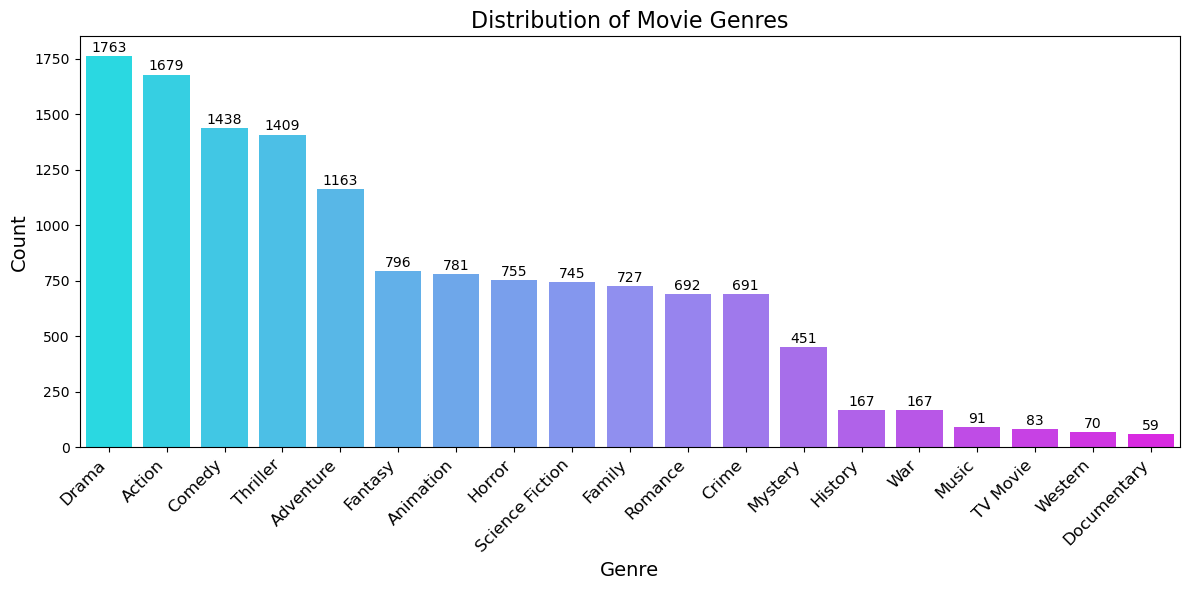

In [46]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=genre_counts2.index, y=genre_counts2.values, palette='cool')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(genre_counts2.values):
    bar_plot.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../images/dist_movie_genre.png', bbox_inches='tight')


The chart provides an overview of the frequency of different genres in the dataset. Action emerges as the most prevalent genre, with a count of 1123. Following action, drama, comedy, adventure, and thriller are among the top genres, illustrating their popularity and frequent occurrence in the dataset. 

**Visualize Release Year**

In [47]:
#create new column that shows the release year
tmdb_df['release_year'] = pd.to_datetime(tmdb_df['release_date']).dt.year


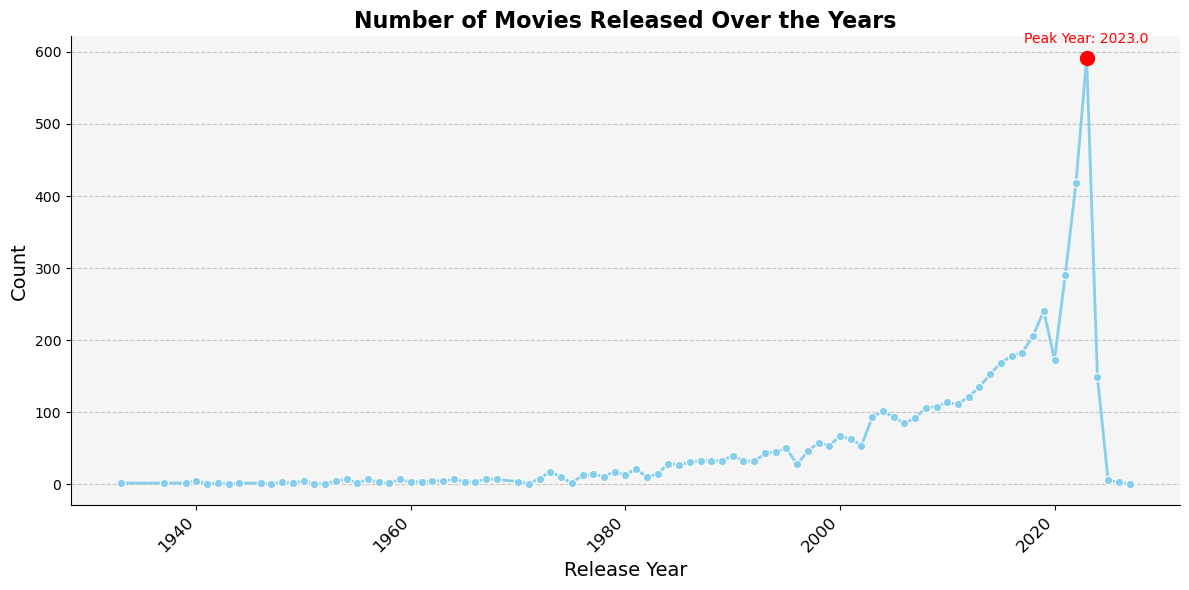

In [48]:
# Explore release years
release_year_counts = tmdb_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=release_year_counts.index, y=release_year_counts.values,
                         marker='o', color='skyblue', linewidth=2)
#highlight the peak year with red mark
peak_year = release_year_counts.idxmax()
plt.scatter(peak_year, release_year_counts.max(), color='red', s=100, zorder=5)

#annotate the peak year
plt.text(peak_year, release_year_counts.max() + 20, f'Peak Year: {peak_year}', 
         color='red', ha='center', fontsize=10)
plt.title('Number of Movies Released Over the Years', fontsize=16, weight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

#background customization
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.savefig('../images/movies_release_year.png', bbox_inches='tight')




The line plot provides a temporal exploration of movie releases within the dataset. The chart offers insights into the temporal distribution of movies, spanning from 1900 to 2026. The red marker highlights the peak year with the highest number of movie releases. In this case, 2023 stands out as the year with the maximum movie releases, with a count of 424. As such, the dataset has a lot of movies for that particular year followed by 2022, 2021, and 2018.

In [49]:
release_year_counts.sort_values(ascending=False)

release_year
2023.0    592
2022.0    418
2021.0    290
2019.0    241
2018.0    206
         ... 
1951.0      1
1947.0      1
1943.0      1
1941.0      1
2027.0      1
Name: count, Length: 89, dtype: int64

**Relationship between Popularity, Genre, User Rating and Vote Count**

In [50]:
#make a string column for genre name to be able to visualize it bc unhasable type error
tmdb_df['genre_ids_str'] = tmdb_df['genre_names'].astype(str)

In [51]:
#bc of large number of unique genre and title type, minimized the ones selected

#most frequent occuring
top_genres = tmdb_df['genre_ids_str'].value_counts().head(40).index
#highest average genre by popularity
top_genres2 = tmdb_df.groupby('genre_ids_str')['popularity'].mean().nlargest(40).index
# selecting the top 40 titles with highest populaity average
top_titles = tmdb_df.nlargest(40, 'popularity')


# selecting the top 40 movies based on user rating
top_user_titles = tmdb_df.nlargest(40, 'vote_average')
# Chighest average genre by user ratings
highest_user_genres = tmdb_df.groupby('genre_ids_str')['vote_average'].mean().nlargest(40)


/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_48705/1613283255.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity',


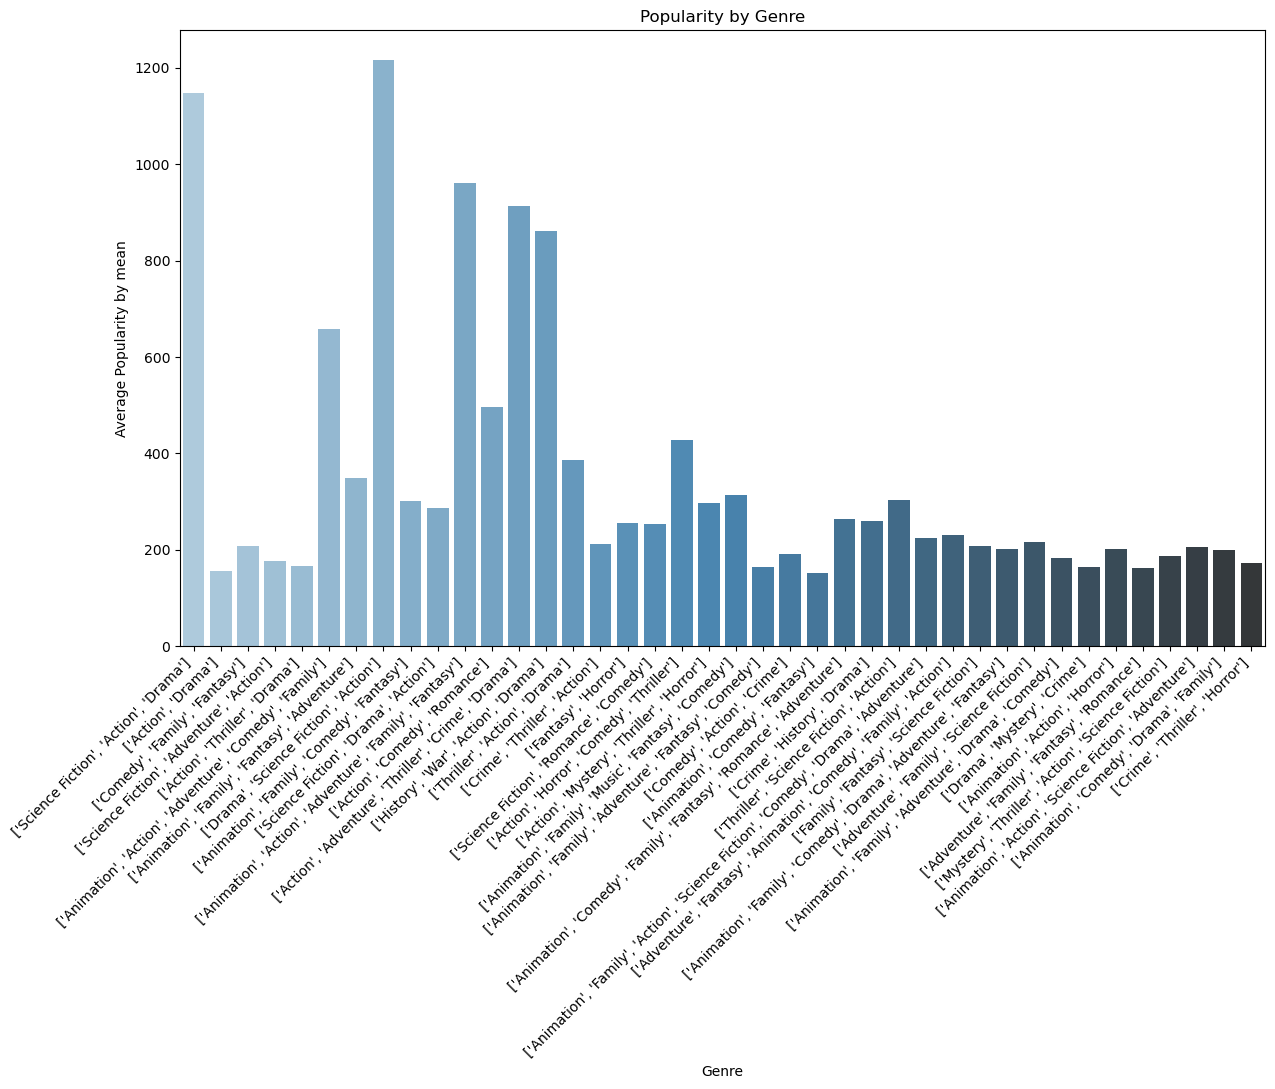

In [52]:
#genres with the highest average popularity, 
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres2)], ci=None, palette='Blues_d')
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity by mean')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40popular_movies_genre.png', bbox_inches='tight')

The chart showcases the top genres with the highest average popularity in descending order. The x-axis indicates the unique genre combination and the y-axis represents the average popularity.The genre with the highest average popularity is Crime and Action, followed by History, war, action, and drama.

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_48705/3706001854.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  top_titles_plot = sns.barplot(x='title', y='popularity',


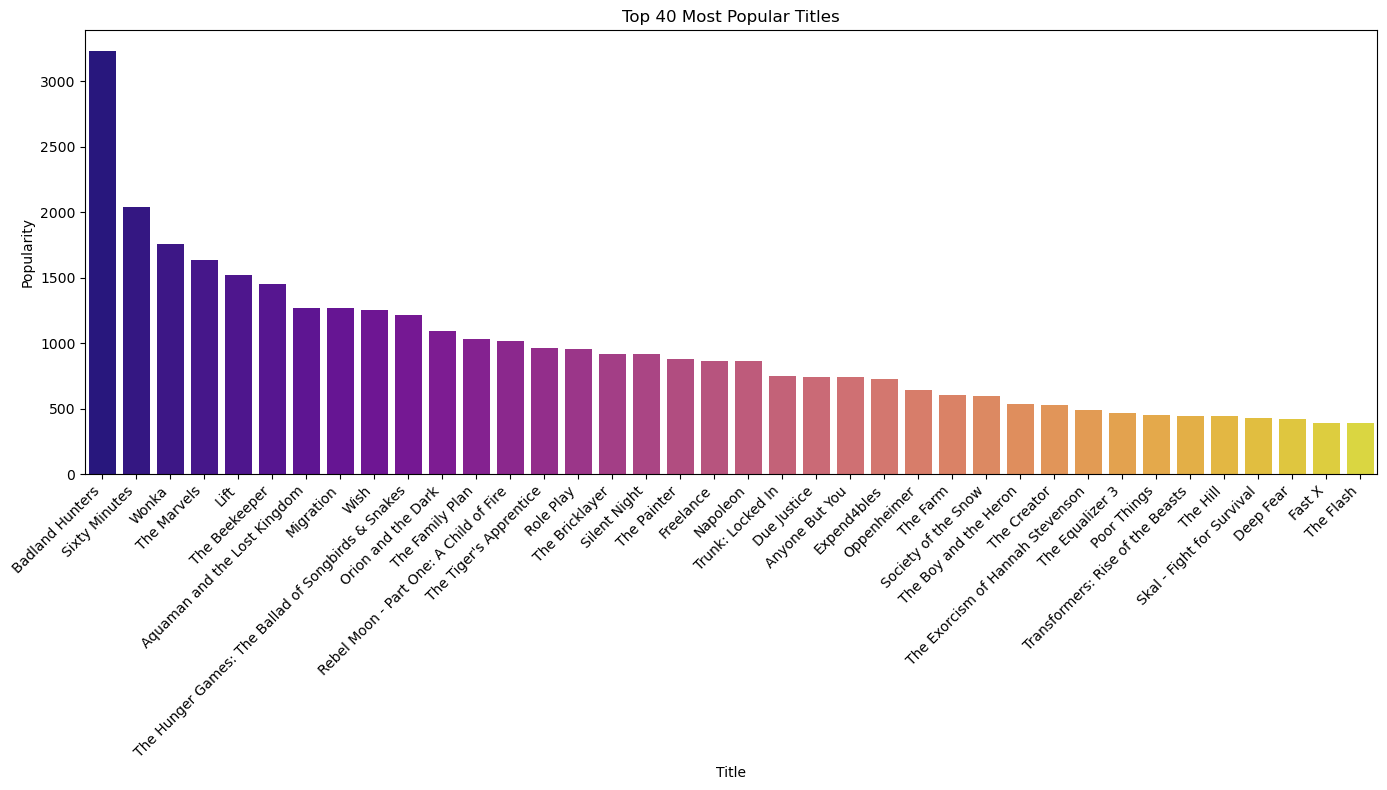

In [53]:
# Visualize the top 40 most popular titles
plt.figure(figsize=(14, 8))
top_titles_plot = sns.barplot(x='title', y='popularity', 
                              data=top_titles, ci=None, palette='plasma')
top_titles_plot.set_xticklabels(top_titles_plot.get_xticklabels(), rotation=45, ha='right') 
plt.title('Top 40 Most Popular Titles')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.tight_layout()
plt.savefig('../images/top_40_popular_titles.png', bbox_inches='tight')






The chart displays the popularity of the top 40 movie titles based on the 'popularity' column. The Beekeeper is the most popular title, as it has the highest bar on the chart, followed by Badland hunters. The chart showcases a diverse range of movie titles not only from america, but from other countries like korea(badland hunter), japan(The Boy and the Heron), russia(Time of Patriots), Latin America(The Society of Snow) and China (Mutant: Ghost Warrior).

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_48705/2227439708.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity',


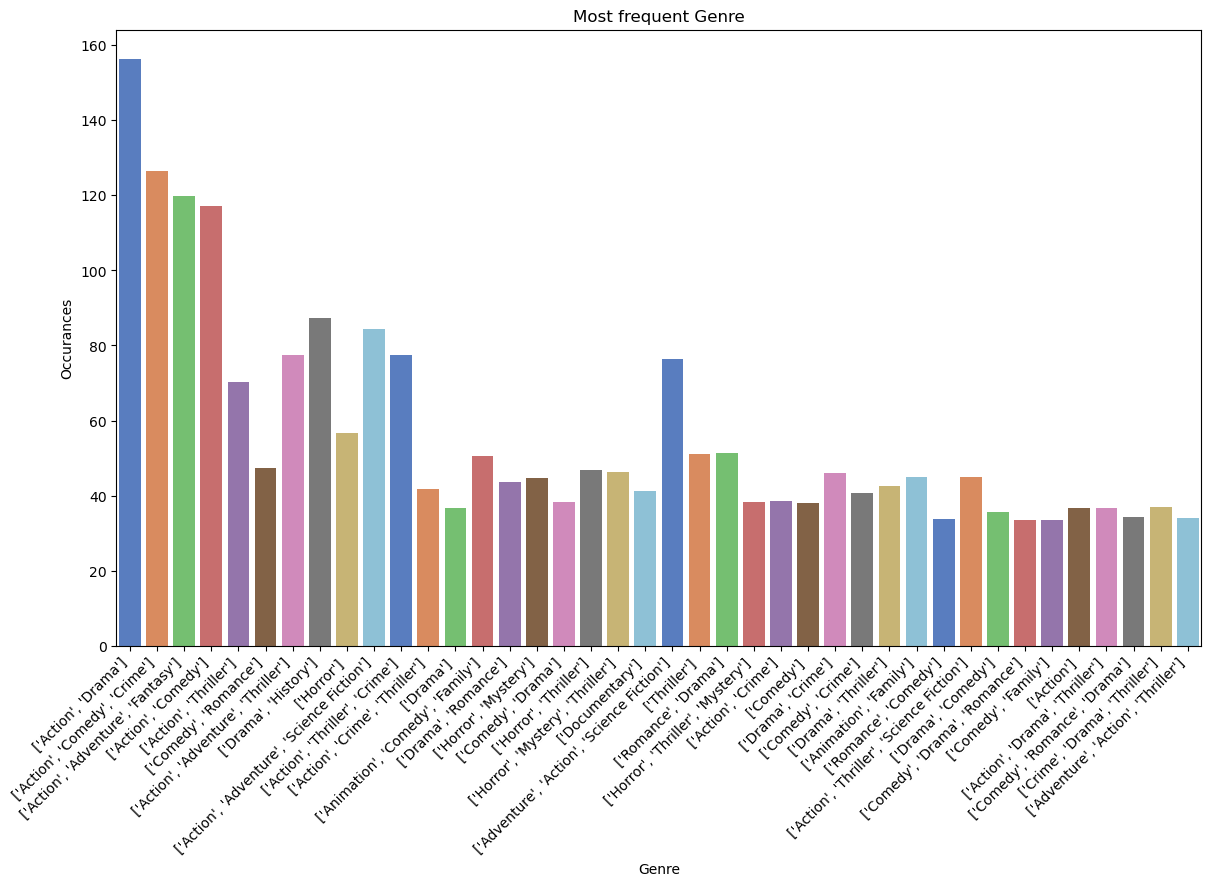

In [54]:
#visualize the top 40 most frequently occurring genres
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], ci=None, palette='muted')
plt.title('Most frequent Genre')
plt.xlabel('Genre')
plt.ylabel('Occurances')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40mostfrequent_genre.png', bbox_inches='tight')



The chart visualizes the frequency of occurrence for each genre among the top 40 movies

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_48705/1708878224.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='title', y='vote_average',


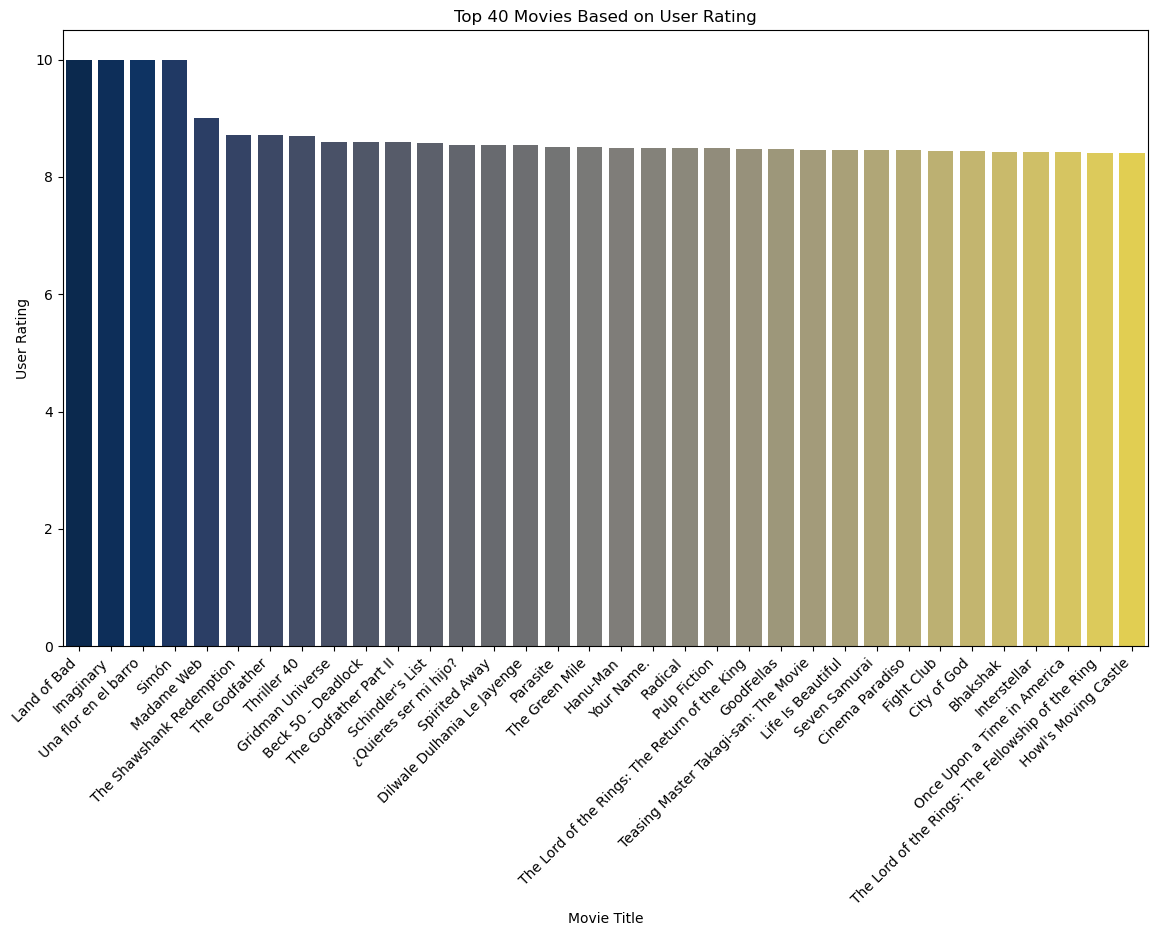

In [55]:
#top movies based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='title', y='vote_average', 
            data=top_user_titles, ci=None, palette='cividis')
plt.title('Top 40 Movies Based on User Rating')
plt.xlabel('Movie Title')
plt.ylabel('User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/top40_user_rated_movies.png', bbox_inches='tight')

The barplot visualizes the average user ratings for the top 40 movies.Bob Marley: One Love and the korean film, the Female Boss Hooker have perfect 10 scores when it comes to user rating.

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_48705/4116190094.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)],


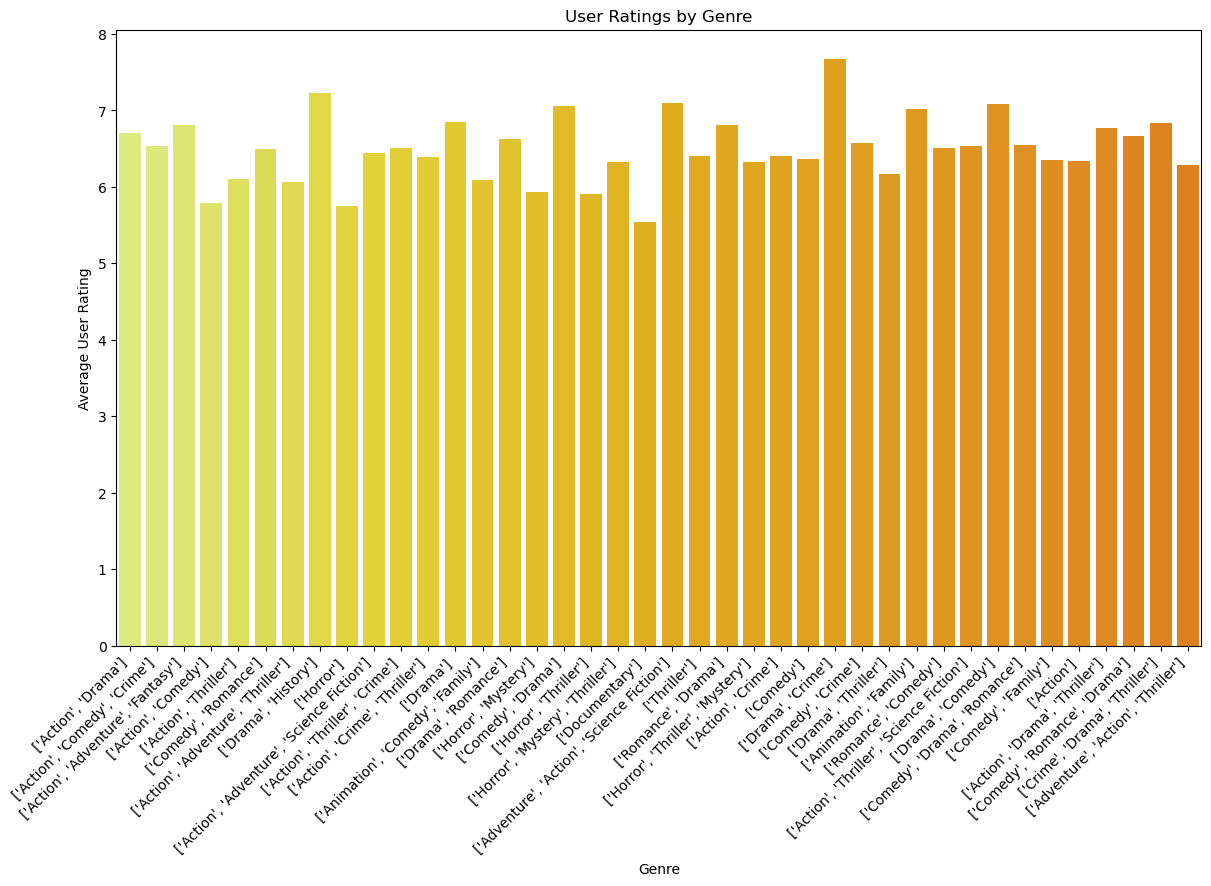

In [56]:
#visualize the top 40  most frequent genre based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], 
            ci=None, palette='Wistia')
plt.title('User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40movies_genre_byuser.png', bbox_inches='tight')


This chart shows the average user ratings for the top 40 movies, grouped by genre. 

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_48705/2174560119.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=highest_user_genres.index,


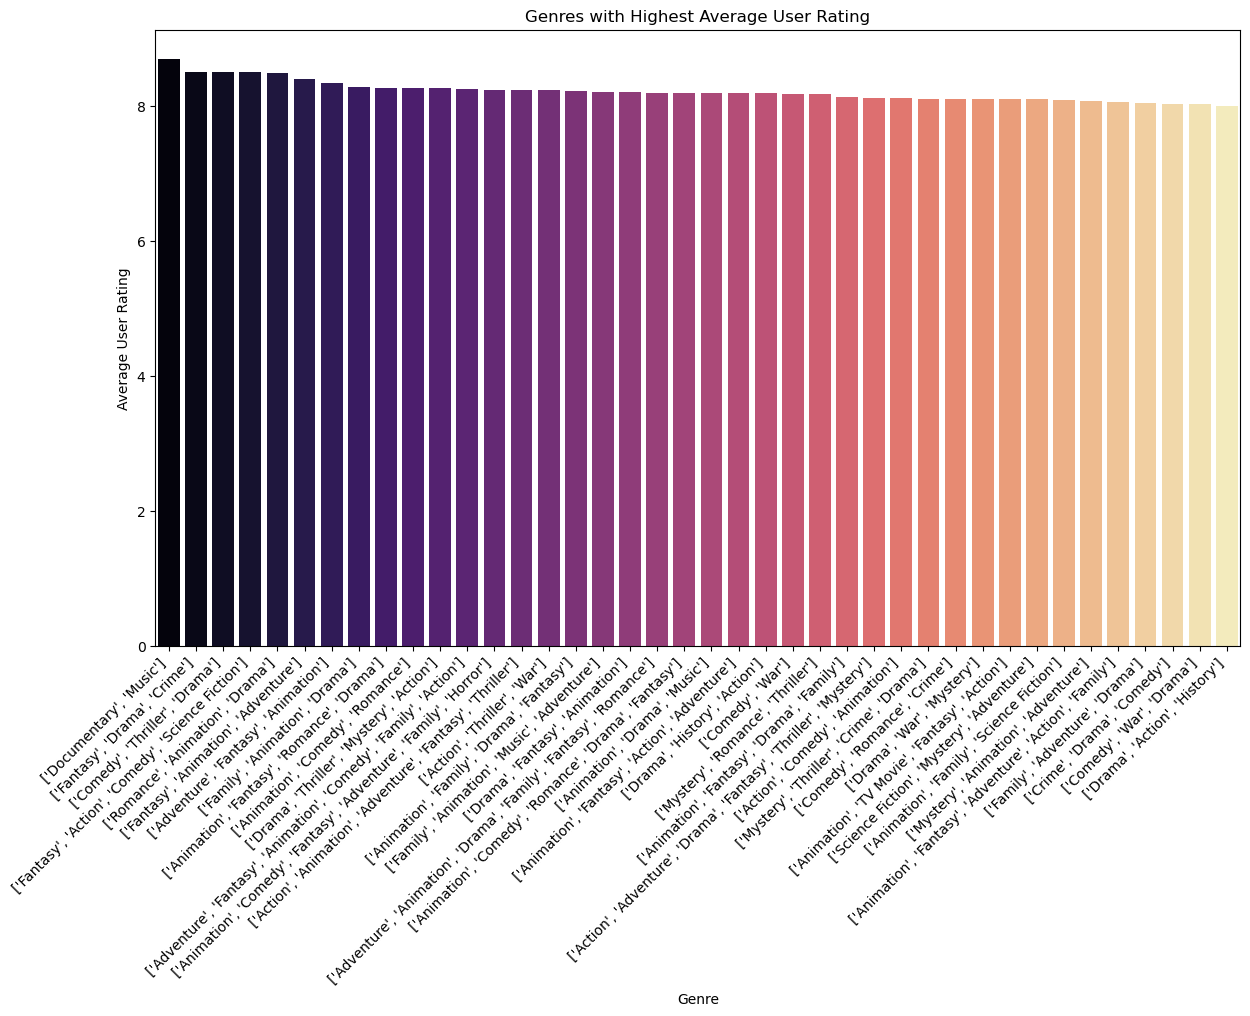

In [57]:
plt.figure(figsize=(14, 8))
sns.barplot(x=highest_user_genres.index, 
            y=highest_user_genres.values, ci=None, palette='magma')
plt.title('Genres with Highest Average User Rating')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/highest_avg_user_rated_genres.png', bbox_inches='tight')

The chart visulizes movie genres that consistently receive high user ratings. The combination of 'Drama', 'Action', 'Crime', and 'Thriller' genres tops the list with an impressive average rating of 8.515. Comedy combined with thriller and drama follows closely with an average rating of 8.512.

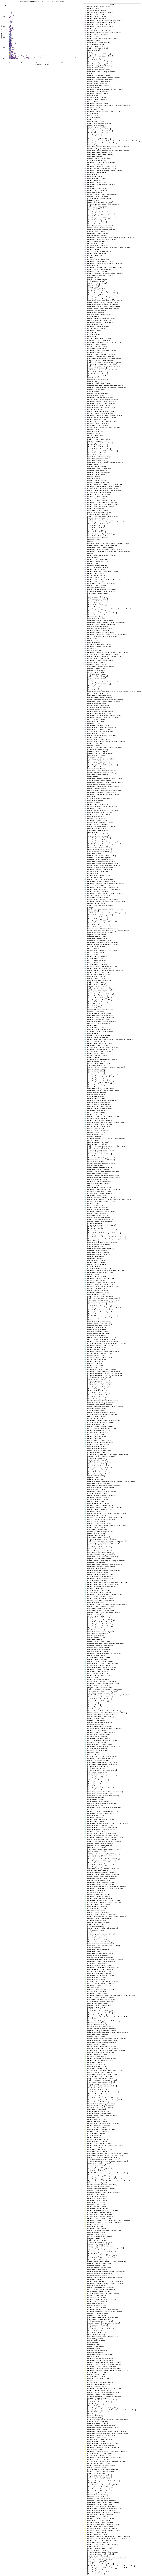

In [58]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='popularity_normalized', y='vote_count_normalized', 
                data=tmdb_df, hue='genre_ids_str', palette='viridis', alpha=0.7)
plt.title('Relationship between Popularity, Vote Count, and Genre')
plt.xlabel('Normalized Popularity')
plt.ylabel('Normalized Vote Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')



The scatter plot visually represents the relationship between normalized popularity, normalized vote count, and movie genres. Each point on the plot corresponds to a movie in the dataset (the one at 1.0 is more than likely the Beekeper), and the position of the point is determined by its normalized popularity on the x-axis and normalized vote count on the y-axis. The movies based on normalized popularity are concentrated around the range of 0.0 to 0.1 on the x-axis. Similarly, normalized vote counts are clustered around the range of 0.0 to 0.7 on the y-axis.


In [ ]:
# Save the DataFrame to a CSV file
tmdb_df.to_csv('../data/tmdb_data.csv', index=False)
